In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
test = pd. read_csv('/kaggle/input/fraud-detection/fraudTest.csv')
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

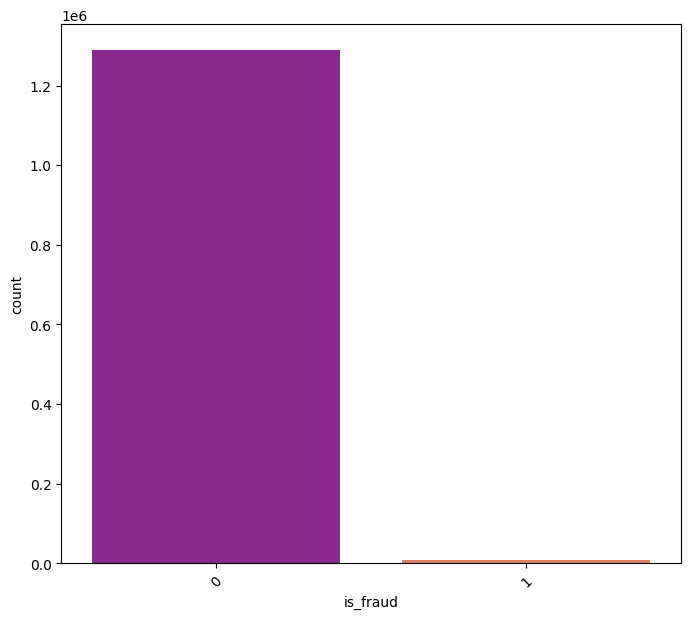

In [5]:
plt.figure(figsize=(8, 7))
sns.countplot(x=data['is_fraud'], palette='plasma')
plt.xticks(np.arange(0, 2), rotation=45)
plt.show()

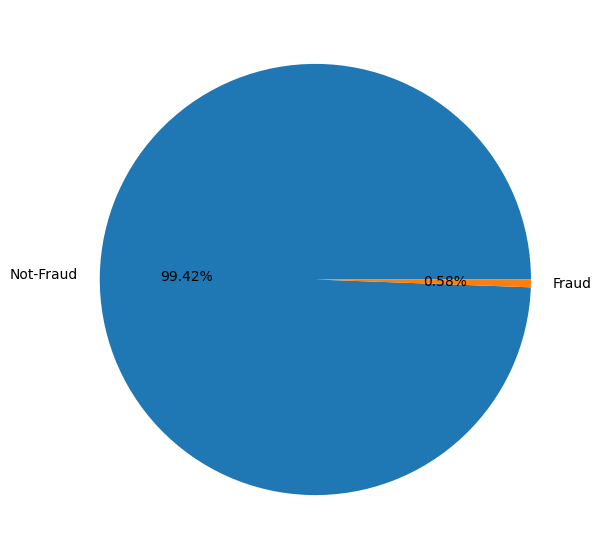

In [6]:
plt.figure(figsize=(10, 7))
plt.pie(data['is_fraud'].value_counts().values, labels=['Not-Fraud', 'Fraud'], autopct='%.2f%%')
plt.show()

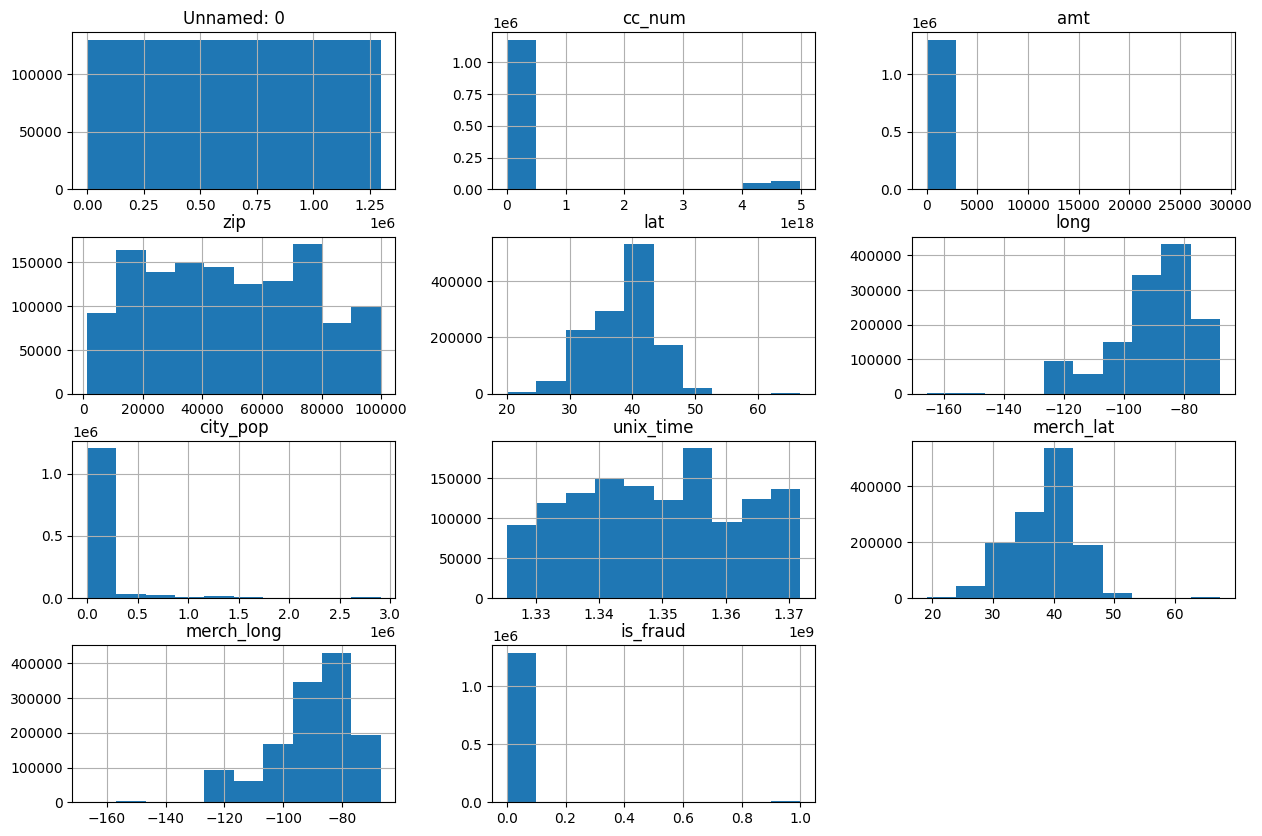

In [7]:
data.hist(figsize=(15, 10))
plt.show()

In [8]:
numericData = data.select_dtypes(include=['int', 'float'])
numericData

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,30263540414123,15.56,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,0
1296671,1296671,6011149206456997,51.70,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,0
1296672,1296672,3514865930894695,105.93,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,0
1296673,1296673,2720012583106919,74.90,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,0


<Axes: >

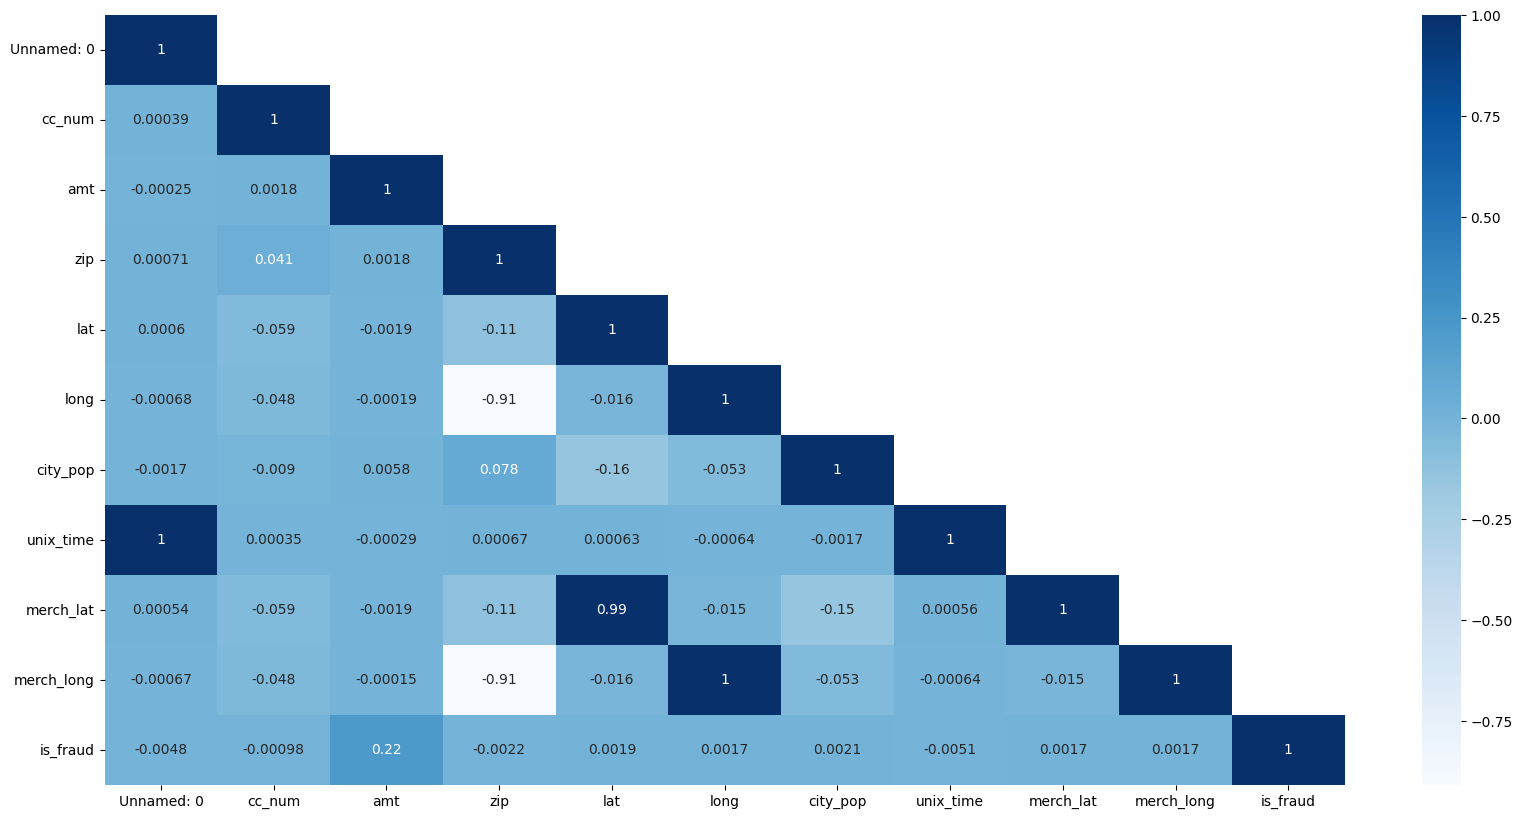

In [9]:
corr_matrix = numericData.corr()
plt.figure(figsize=(20, 10))
corr_matrix = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool_))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

In [10]:
data = data.drop(columns=['merch_lat', 'merch_long', 'first', 'last', 'city', 'state', 'street', 'trans_date_trans_time', 'dob', 'trans_num', 'Unnamed: 0'])
test = test.drop(columns=['merch_lat', 'merch_long', 'first', 'last', 'city', 'state', 'street', 'trans_date_trans_time', 'dob', 'trans_num', 'Unnamed: 0'])
numericData = numericData.drop(columns=['merch_lat', 'merch_long'])
data.head()

,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,job,unix_time,is_fraud
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,48.8878,-118.2105,149,Special educational needs teacher,1325376044,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,83252,42.1808,-112.2620,4154,Nature conservation officer,1325376051,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632,46.2306,-112.1138,1939,Patent attorney,1325376076,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,0


In [11]:
data['category'].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

# Encoding

In [12]:
target = data['is_fraud']
data = data.drop(columns=['is_fraud'])

In [13]:
Y_test = test['is_fraud']
X_test = test.drop(columns=['is_fraud'])

In [14]:
# Train encoding
from sklearn.preprocessing import OneHotEncoder

GOHencoder = OneHotEncoder()
gender = pd.DataFrame(GOHencoder.fit_transform(pd.DataFrame(data['gender'])).toarray(), columns=GOHencoder.get_feature_names_out(), index=data.index)

In [15]:
data = pd.concat([data, gender], axis=1)
data = data.drop(columns=['gender'])
data.head()

,cc_num,merchant,category,amt,zip,lat,long,city_pop,job,unix_time,gender_F,gender_M
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,1.0,0.0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,99160,48.8878,-118.2105,149,Special educational needs teacher,1325376044,1.0,0.0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,83252,42.1808,-112.2620,4154,Nature conservation officer,1325376051,0.0,1.0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,59632,46.2306,-112.1138,1939,Patent attorney,1325376076,0.0,1.0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,0.0,1.0


In [16]:
# Test Encoding
gender2 = pd.DataFrame(GOHencoder.fit_transform(pd.DataFrame(X_test['gender'])).toarray(), columns=GOHencoder.get_feature_names_out(), index=X_test.index)

In [17]:
X_test = pd.concat([X_test, gender2], axis=1)
X_test = X_test.drop(columns=['gender'])
data.head()

,cc_num,merchant,category,amt,zip,lat,long,city_pop,job,unix_time,gender_F,gender_M
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,1.0,0.0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,99160,48.8878,-118.2105,149,Special educational needs teacher,1325376044,1.0,0.0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,83252,42.1808,-112.2620,4154,Nature conservation officer,1325376051,0.0,1.0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,59632,46.2306,-112.1138,1939,Patent attorney,1325376076,0.0,1.0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,0.0,1.0


In [18]:
from category_encoders import CountEncoder

In [19]:
# Train encoding
CCencoder = CountEncoder()
MCencoder = CountEncoder()
JCencoder = CountEncoder()
category = CCencoder.fit_transform(pd.DataFrame(data['category']))
merchant = MCencoder.fit_transform(pd.DataFrame(data['merchant']))
job = JCencoder.fit_transform(pd.DataFrame(data['job']))

In [20]:
data = data.drop(columns=['merchant', 'job', 'category'])
data = pd.concat([data, merchant, job, category], axis=1)
data.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,gender_F,gender_M,merchant,job,category
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,1.0,0.0,1267,3545,63287
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,1.0,0.0,2503,5099,123638
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,0.0,1.0,1895,511,94014
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,0.0,1.0,2613,2530,131659
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,0.0,1.0,1592,2017,79655


In [21]:
# Test Encoding
category2 = CCencoder.transform(pd.DataFrame(X_test['category']))
merchant2 = MCencoder.transform(pd.DataFrame(X_test['merchant']))
job2 = JCencoder.transform(pd.DataFrame(X_test['job']))

In [22]:
X_test = X_test.drop(columns=['merchant', 'job', 'category'])
X_test = pd.concat([X_test, merchant2, job2, category2], axis=1)
data.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,gender_F,gender_M,merchant,job,category
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,1.0,0.0,1267,3545,63287
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,1.0,0.0,2503,5099,123638
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,0.0,1.0,1895,511,94014
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,0.0,1.0,2613,2530,131659
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,0.0,1.0,1592,2017,79655


# Resampling data

In [23]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [24]:
# Train Resample
ros = RandomOverSampler(random_state=42, sampling_strategy={1:150000})
X_resampled, Y_resampled = ros.fit_resample(data, target)

In [25]:
rus = RandomUnderSampler(random_state=42)
X_resampled, Y_resampled = rus.fit_resample(X_resampled, Y_resampled)

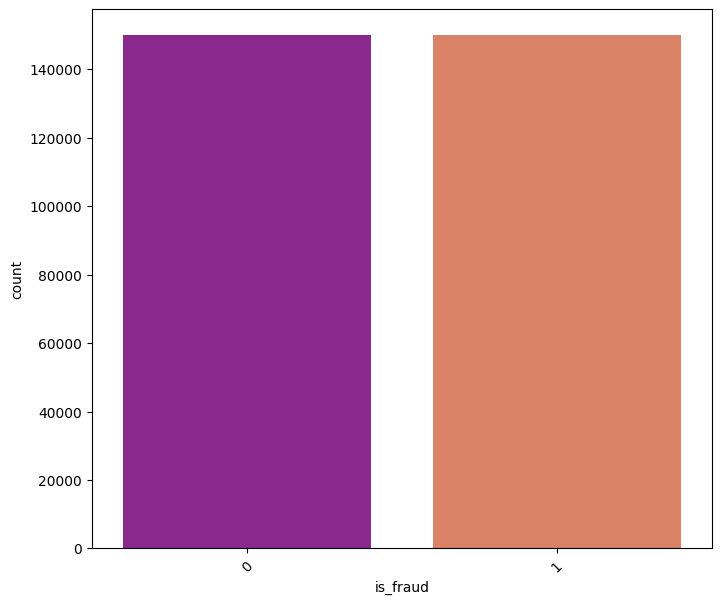

In [26]:
plt.figure(figsize=(8, 7))
sns.countplot(x=Y_resampled, palette='plasma')
plt.xticks(np.arange(0, 2), rotation=45)
plt.show()

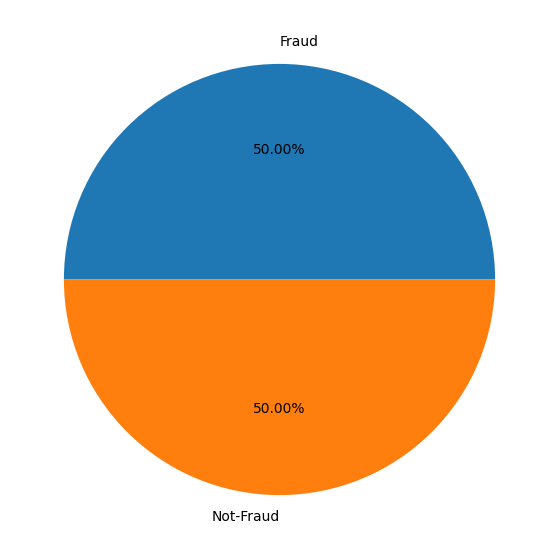

In [27]:
plt.figure(figsize=(10, 7))
plt.pie(Y_resampled.value_counts().values, labels=['Fraud', 'Not-Fraud'], autopct='%.2f%%')
plt.show()

# Data Scaling

In [28]:
X_train = X_resampled.copy()
Y_train = Y_resampled.copy()

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
# Train Scaling
scaler = StandardScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
scaled_X_train

,cc_num,amt,zip,lat,long,city_pop,unix_time,gender_F,gender_M,merchant,job,category
811778,-0.317215,-0.570720,1.549821,-0.896002,-2.028919,-0.001973,0.452482,0.958436,-0.958436,0.893069,-0.791091,1.262571
1101718,-0.317192,-0.571735,0.571025,-0.370230,0.031529,-0.293778,1.210816,0.958436,-0.958436,-0.333919,-1.026873,-0.319191
800013,-0.313622,-0.535693,-1.214901,0.265424,0.734205,-0.296455,0.432028,0.958436,-0.958436,0.907830,1.931902,0.925546
398945,-0.313577,-0.688544,0.408028,1.892446,-1.625819,-0.294662,-0.581621,0.958436,-0.958436,0.715940,1.195802,0.903571
207455,-0.314494,-0.789670,-0.395525,-0.417960,0.541600,-0.017742,-1.073484,0.958436,-0.958436,-0.195537,-0.297003,-0.170910
...,...,...,...,...,...,...,...,...,...,...,...,...
1439164,-0.317212,1.251068,1.067911,-1.683593,-0.372070,0.326484,0.520667,-1.043366,1.043366,0.527740,-0.542370,0.632850
1439165,-0.317213,-0.736635,0.115636,0.561549,-0.376952,-0.290517,1.025905,0.958436,-0.958436,0.284188,0.200918,0.480031
1439166,-0.313750,-0.018068,-0.867107,-0.241111,0.600814,-0.295964,0.657134,-1.043366,1.043366,0.721475,-0.522242,0.925546
1439167,-0.316924,1.437583,0.212755,1.226655,0.136694,-0.279259,0.539749,-1.043366,1.043366,-0.260115,1.189572,-0.170910


In [31]:
# Test Scaling
scaled_X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns, index=X_test.index)
scaled_X_test

,cc_num,amt,zip,lat,long,city_pop,unix_time,gender_F,gender_M,merchant,job,category
0,-0.317252,-0.424463,-0.731091,-0.904377,0.677451,0.816521,-1.703871,-1.102494,1.102494,-0.432060,0.839764,-0.409266
1,-0.316273,-0.252337,1.309217,0.351182,-1.472454,-0.292685,-1.703869,0.907034,-0.907034,-0.415102,0.782721,-0.409266
2,-0.316254,-0.179353,-1.382695,0.420768,1.216667,-0.178853,-1.703865,0.907034,-0.907034,-0.620487,1.114565,-0.612042
3,-0.316259,-0.059605,-0.598119,-1.970539,0.685934,-0.111371,-1.703861,-1.102494,1.102494,-0.784418,-1.187510,-0.870718
4,-0.316308,-0.422358,0.029394,1.128092,0.380004,-0.289942,-1.703861,-1.102494,1.102494,-2.288060,-0.940488,-2.497748
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,-0.318978,-0.163467,0.544041,0.385244,-0.120967,-0.291963,1.510350,-1.102494,1.102494,-0.684552,0.105144,-0.612042
555715,-0.316286,0.270803,1.069562,-1.877757,-0.379599,-0.198018,1.510351,-1.102494,1.102494,0.446006,0.097703,0.516589
555716,-0.314411,0.111564,1.879720,1.512121,-2.089408,-0.281427,1.510352,0.907034,-0.907034,0.383826,1.110596,0.516589
555717,-0.318998,-0.391735,1.295849,1.201709,-1.910685,-0.293261,1.510354,-1.102494,1.102494,-2.346472,-0.942968,-2.497748


# Model Selection

In [32]:
model_name_train, accuracy_train, recall_train, precision_train, f1_train, roc_auc_train = [], [], [], [], [], []
model_name_test, accuracy_test, recall_test, precision_test, f1_test, roc_auc_test = [], [], [], [], [], []

In [33]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, classification_report

def analysis_model_with_test(modelname, model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_score = model.predict_proba(x_test)[:,1]

    model_name_test.append(modelname)
    accuracy_test.append(accuracy_score(y_test, y_pred))
    f1_test.append(f1_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    precision_test.append(precision_score(y_test, y_pred))
    roc_auc_test.append(roc_auc_score(y_test, y_score))

    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('Recall Score:', recall_score(y_test, y_pred))
    print('Precision Score:', precision_score(y_test, y_pred))
    print('ROC AUC:', roc_auc_score(y_test, y_score))

    fig, ax = plt.subplots(1, 2, figsize=(11, 6))
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    display.plot(ax=ax[0]), ax[0].set_title('Confusion Matrix')
    
    # ROC AUC
    fpr, tpr, threshold = roc_curve(y_test, y_score)
    ax[1].plot(fpr, tpr, label=f'{modelname}, AUC:{round(roc_auc_score(y_test, y_score), 4)}')
    ax[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title(f'ROC Curve of {modelname} in Test')
    plt.legend()
    plt.show()
    print(classification_report(y_test, y_pred))

In [34]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, classification_report

def analysis_model_with_test_svm(modelname, model, x_test, y_test):
    y_pred = model.predict(x_test)

    model_name_test.append(modelname)
    accuracy_test.append(accuracy_score(y_test, y_pred))
    f1_test.append(f1_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    precision_test.append(precision_score(y_test, y_pred))
    roc_auc_test.append(roc_auc_score(y_test, y_pred))

    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('Recall Score:', recall_score(y_test, y_pred))
    print('Precision Score:', precision_score(y_test, y_pred))
    print('ROC AUC:', roc_auc_score(y_test, y_pred))

    fig, ax = plt.subplots(1, 2, figsize=(11, 6))
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    display.plot(ax=ax[0]), ax[0].set_title('Confusion Matrix')
    
    # ROC AUC
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    ax[1].plot(fpr, tpr, label=f'{modelname}, AUC:{round(roc_auc_score(y_test, y_pred), 4)}')
    ax[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title(f'ROC Curve of {modelname} in Test')
    plt.legend()
    plt.show()
    print(classification_report(y_test, y_pred))

In [35]:
def analysis_model_with_train(modelname, model, x_train, y_train):
    y_pred = model.predict(x_train)
    y_score = model.predict_proba(x_train)[:,1]
    
    model_name_train.append(modelname)
    accuracy_train.append(accuracy_score(y_train, y_pred))
    f1_train.append(f1_score(y_train, y_pred))
    recall_train.append(recall_score(y_train, y_pred))
    precision_train.append(precision_score(y_train, y_pred))
    roc_auc_train.append(roc_auc_score(y_train, y_score))

    print('Accuracy Score:', accuracy_score(y_train, y_pred))
    print('F1 Score:', f1_score(y_train, y_pred))
    print('Recall Score:', recall_score(y_train, y_pred))
    print('Precision Score:', precision_score(y_train, y_pred))
    print('ROC AUC:', roc_auc_score(y_train, y_score))

    fig, ax = plt.subplots(1, 2, figsize=(11, 6))
    # Confusion Matrix
    conf_mat = confusion_matrix(y_train, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    display.plot(ax=ax[0]), ax[0].set_title('Confusion Matrix')
    
    # ROC AUC
    fpr, tpr, threshold = roc_curve(y_train, y_score)
    ax[1].plot(fpr, tpr, label=f'{modelname}, AUC:{round(roc_auc_score(y_train, y_score), 4)}')
    ax[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title(f'ROC Curve of {modelname} in Train')
    plt.legend()
    plt.show()
    print(classification_report(y_train, y_pred))

In [36]:
def analysis_model_with_train_svm(modelname, model, x_train, y_train):
    y_pred = model.predict(x_train)

    model_name_train.append(modelname)
    accuracy_train.append(accuracy_score(y_train, y_pred))
    f1_train.append(f1_score(y_train, y_pred))
    recall_train.append(recall_score(y_train, y_pred))
    precision_train.append(precision_score(y_train, y_pred))
    roc_auc_train.append(roc_auc_score(y_train, y_pred))

    print('Accuracy Score:', accuracy_score(y_train, y_pred))
    print('F1 Score:', f1_score(y_train, y_pred))
    print('Recall Score:', recall_score(y_train, y_pred))
    print('Precision Score:', precision_score(y_train, y_pred))
    print('ROC AUC:', roc_auc_score(y_train, y_pred))

    fig, ax = plt.subplots(1, 2, figsize=(11, 6))
    # Confusion Matrix
    conf_mat = confusion_matrix(y_train, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    display.plot(ax=ax[0]), ax[0].set_title('Confusion Matrix')
    
    # ROC AUC
    fpr, tpr, threshold = roc_curve(y_train, y_pred)
    ax[1].plot(fpr, tpr, label=f'{modelname}, AUC:{round(roc_auc_score(y_train, y_pred), 4)}')
    ax[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title(f'ROC Curve of {modelname} in Train')
    plt.legend()
    plt.show()
    print(classification_report(y_train, y_pred))

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logistic_regressor = LogisticRegression()
logistic_regressor.fit(scaled_X_train, Y_train)

LogisticRegression()

Accuracy Score: 0.85638
F1 Score: 0.8411810239964612
Recall Score: 0.76068
Precision Score: 0.9407370764283948
ROC AUC: 0.8538966464888889


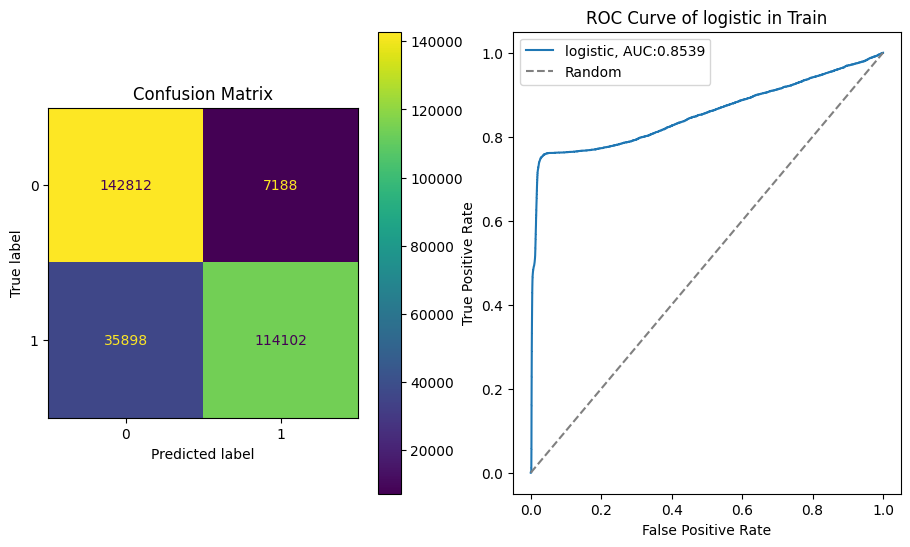

              precision    recall  f1-score   support

           0       0.80      0.95      0.87    150000
           1       0.94      0.76      0.84    150000

    accuracy                           0.86    300000
   macro avg       0.87      0.86      0.86    300000
weighted avg       0.87      0.86      0.86    300000



In [39]:
analysis_model_with_train('logistic', logistic_regressor, scaled_X_train, Y_train)

Accuracy Score: 0.38880801268266874
F1 Score: 0.01076462004910484
Recall Score: 0.8615384615384616
Precision Score: 0.005416146446972761
ROC AUC: 0.8347377330357022


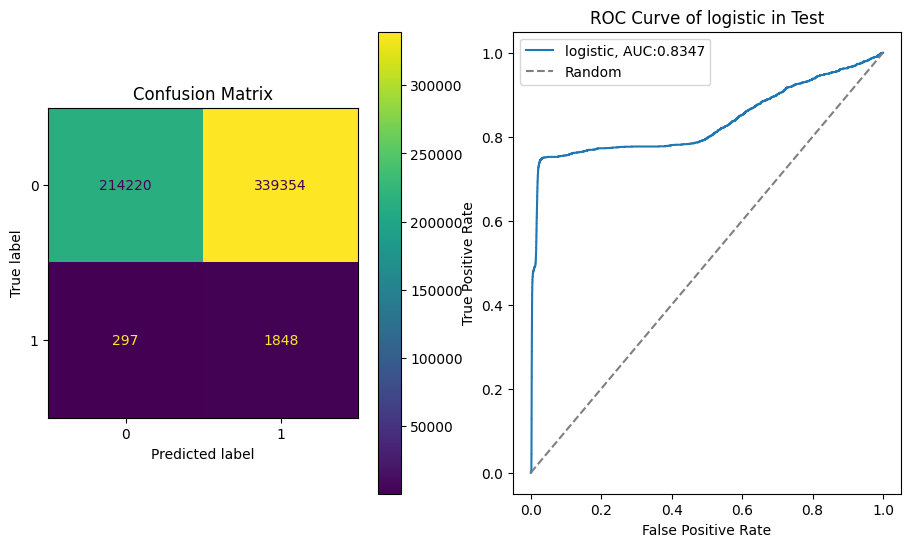

              precision    recall  f1-score   support

           0       1.00      0.39      0.56    553574
           1       0.01      0.86      0.01      2145

    accuracy                           0.39    555719
   macro avg       0.50      0.62      0.28    555719
weighted avg       0.99      0.39      0.56    555719



In [40]:
analysis_model_with_test('logistic', logistic_regressor, scaled_X_test, Y_test)

# SVM


In [41]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [42]:
linear_svc = LinearSVC()
linear_svc.fit(scaled_X_train, Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

Accuracy Score: 0.8591333333333333
F1 Score: 0.8420647437382744
Recall Score: 0.75106
Precision Score: 0.9581639422340914
ROC AUC: 0.8591333333333332


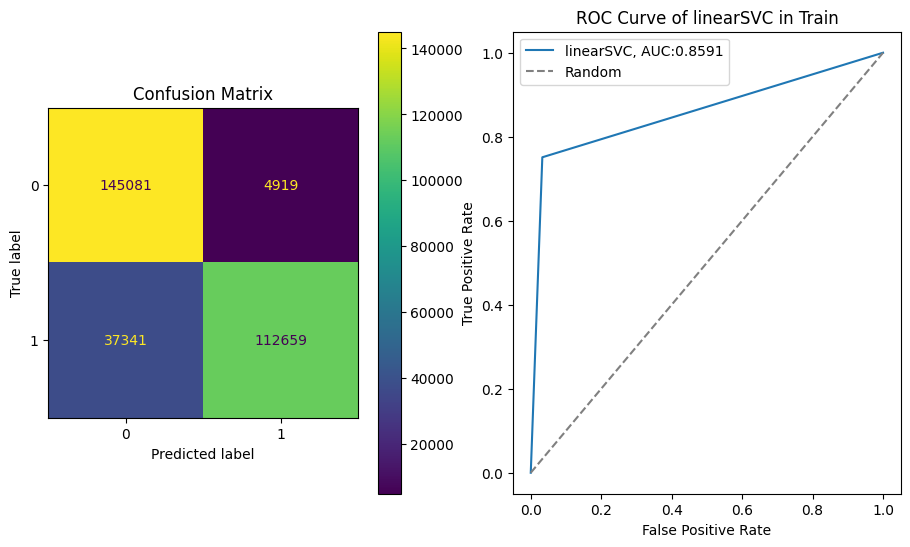

              precision    recall  f1-score   support

           0       0.80      0.97      0.87    150000
           1       0.96      0.75      0.84    150000

    accuracy                           0.86    300000
   macro avg       0.88      0.86      0.86    300000
weighted avg       0.88      0.86      0.86    300000



In [43]:
analysis_model_with_train_svm('linearSVC', linear_svc, scaled_X_train, Y_train)

Accuracy Score: 0.49691120872239386
F1 Score: 0.012426967720969007
Recall Score: 0.8200466200466201
Precision Score: 0.006260922800935401
ROC AUC: 0.6578528684924578


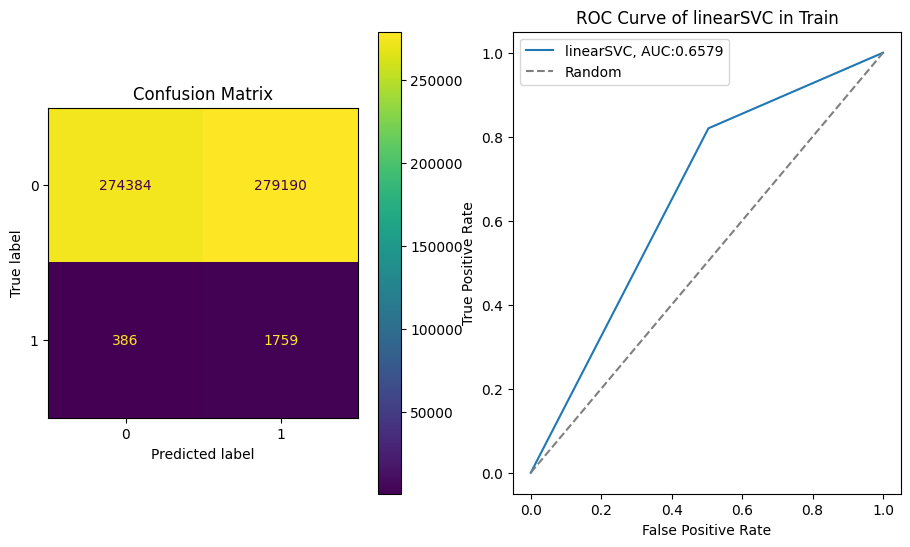

              precision    recall  f1-score   support

           0       1.00      0.50      0.66    553574
           1       0.01      0.82      0.01      2145

    accuracy                           0.50    555719
   macro avg       0.50      0.66      0.34    555719
weighted avg       0.99      0.50      0.66    555719



In [44]:
analysis_model_with_train_svm('linearSVC', linear_svc, scaled_X_test, Y_test)

# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

Accuracy Score: 1.0
F1 Score: 1.0
Recall Score: 1.0
Precision Score: 1.0
ROC AUC: 1.0


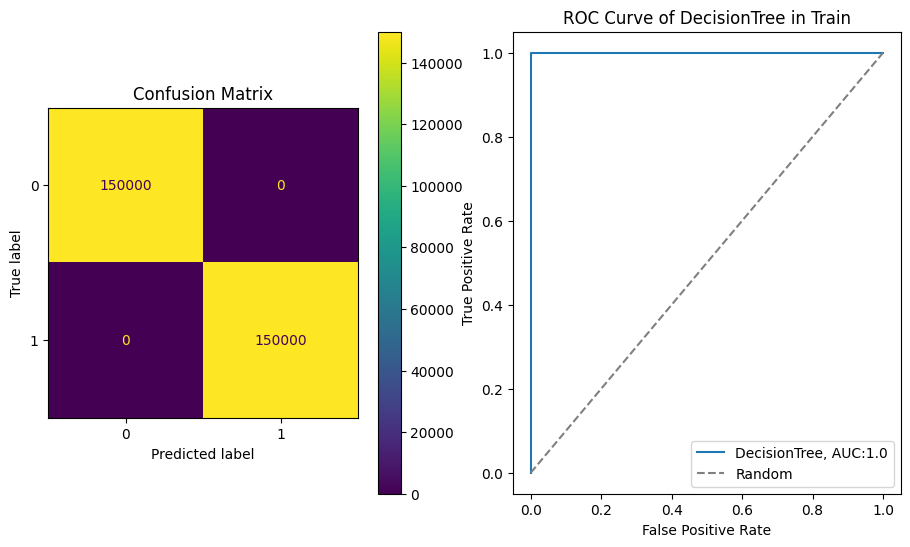

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    150000
           1       1.00      1.00      1.00    150000

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



In [47]:
analysis_model_with_train('DecisionTree', decision_tree, X_train, Y_train)

Accuracy Score: 0.9910494332567359
F1 Score: 0.3931185944363105
Recall Score: 0.7510489510489511
Precision Score: 0.2662369856222112
ROC AUC: 0.8715141715723391


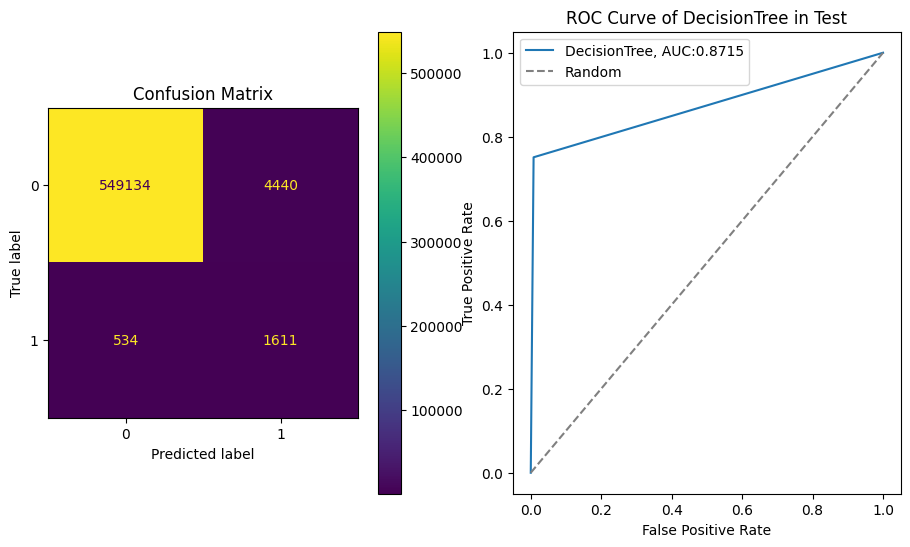

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.27      0.75      0.39      2145

    accuracy                           0.99    555719
   macro avg       0.63      0.87      0.69    555719
weighted avg       1.00      0.99      0.99    555719



In [48]:
analysis_model_with_test('DecisionTree', decision_tree, X_test, Y_test)

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
random_forest = RandomForestClassifier(n_estimators=120)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=120)

Accuracy Score: 1.0
F1 Score: 1.0
Recall Score: 1.0
Precision Score: 1.0
ROC AUC: 1.0


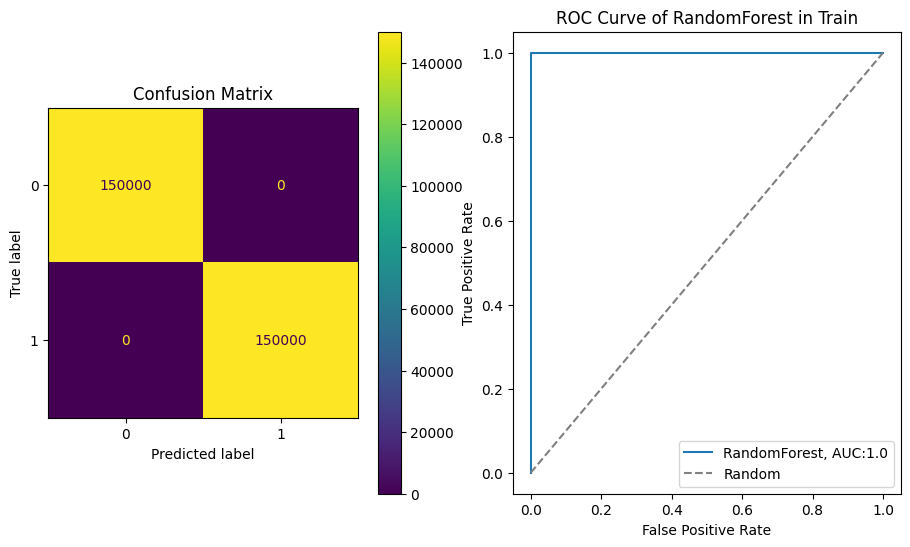

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    150000
           1       1.00      1.00      1.00    150000

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



In [51]:
analysis_model_with_train('RandomForest', random_forest, X_train, Y_train)

Accuracy Score: 0.9960303678657739
F1 Score: 0.5978855267954793
Recall Score: 0.7645687645687645
Precision Score: 0.49087099670757256
ROC AUC: 0.9845122834475658


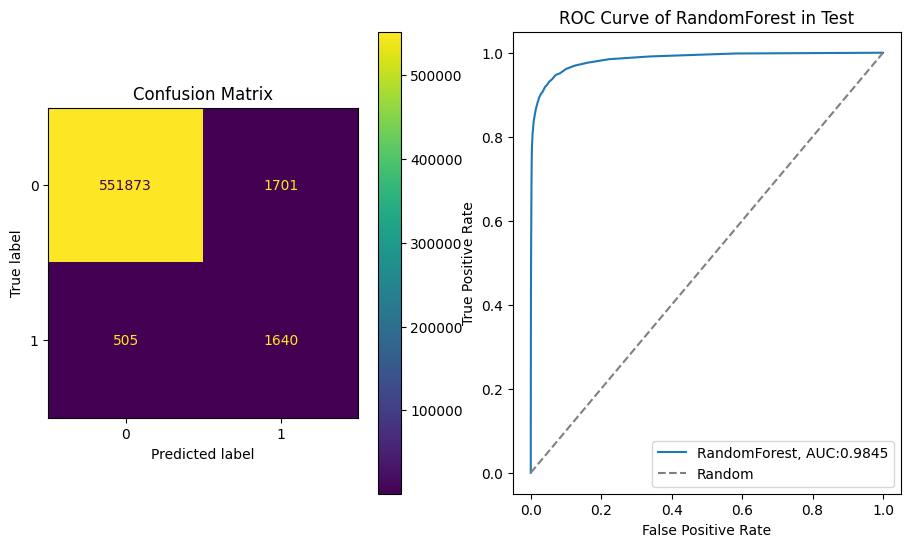

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.49      0.76      0.60      2145

    accuracy                           1.00    555719
   macro avg       0.74      0.88      0.80    555719
weighted avg       1.00      1.00      1.00    555719



In [52]:
analysis_model_with_test('RandomForest', random_forest, X_test, Y_test)

# KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(scaled_X_train, Y_train)

KNeighborsClassifier()

Accuracy Score: 0.98906
F1 Score: 0.9891783884305696
Recall Score: 1.0
Precision Score: 0.9785884839707206
ROC AUC: 1.0


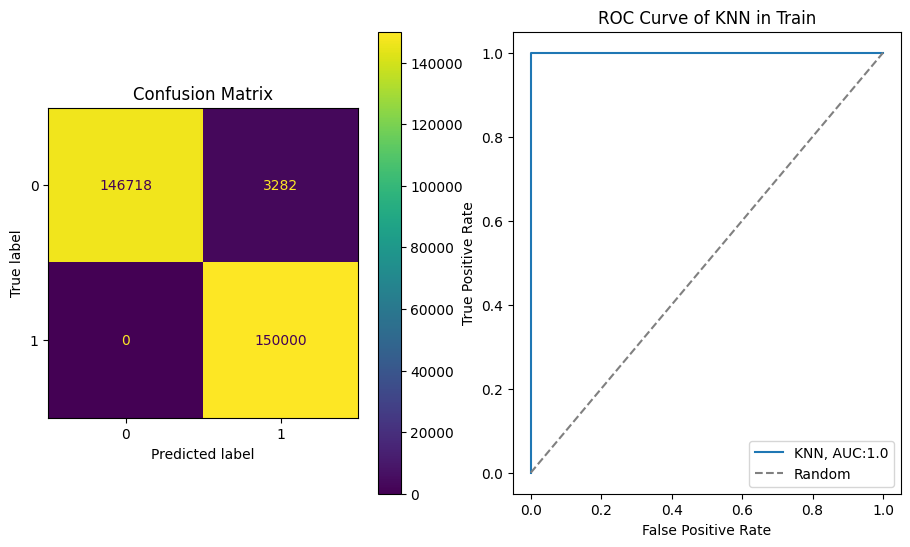

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    150000
           1       0.98      1.00      0.99    150000

    accuracy                           0.99    300000
   macro avg       0.99      0.99      0.99    300000
weighted avg       0.99      0.99      0.99    300000



In [55]:
analysis_model_with_train('KNN', KNN_classifier, scaled_X_train, Y_train)

Accuracy Score: 0.7930194936649637
F1 Score: 0.011940247223248263
Recall Score: 0.32400932400932403
Precision Score: 0.006082192739874681
ROC AUC: 0.566735887128644


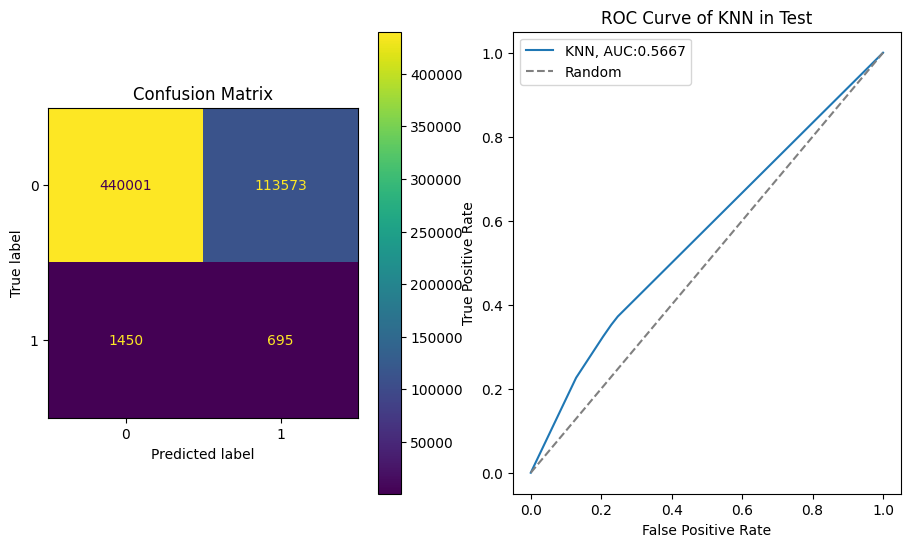

              precision    recall  f1-score   support

           0       1.00      0.79      0.88    553574
           1       0.01      0.32      0.01      2145

    accuracy                           0.79    555719
   macro avg       0.50      0.56      0.45    555719
weighted avg       0.99      0.79      0.88    555719



In [56]:
analysis_model_with_test('KNN', KNN_classifier, scaled_X_test, Y_test)

# Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
Gaussian_NB = GaussianNB()
Gaussian_NB.fit(scaled_X_train, Y_train)

GaussianNB()

Accuracy Score: 0.83966
F1 Score: 0.8163933675338951
Recall Score: 0.71294
Precision Score: 0.9549667809687098
ROC AUC: 0.8645951737333334


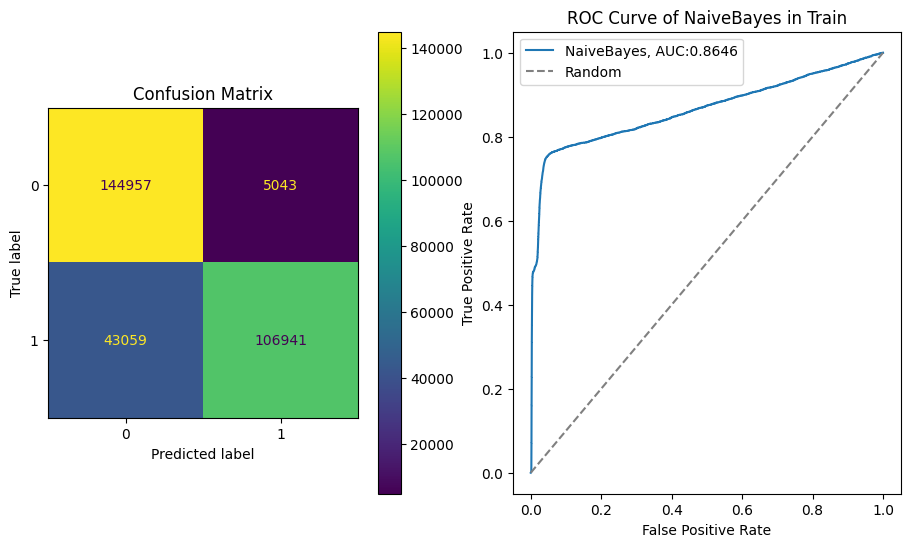

              precision    recall  f1-score   support

           0       0.77      0.97      0.86    150000
           1       0.95      0.71      0.82    150000

    accuracy                           0.84    300000
   macro avg       0.86      0.84      0.84    300000
weighted avg       0.86      0.84      0.84    300000



In [59]:
analysis_model_with_train('NaiveBayes', Gaussian_NB, scaled_X_train, Y_train)

Accuracy Score: 0.6008900181566583
F1 Score: 0.014905684679923073
Recall Score: 0.7822843822843822
Precision Score: 0.007524528708005238
ROC AUC: 0.8256198523579219


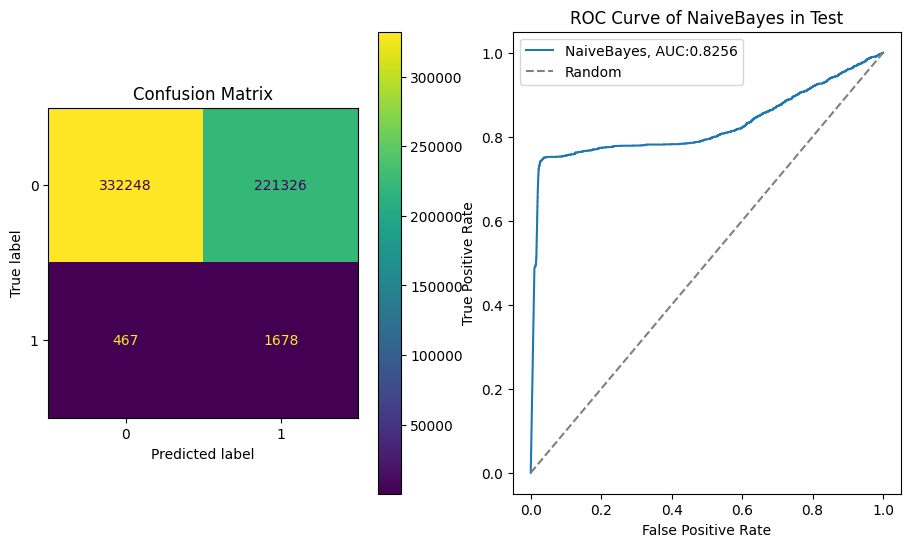

              precision    recall  f1-score   support

           0       1.00      0.60      0.75    553574
           1       0.01      0.78      0.01      2145

    accuracy                           0.60    555719
   macro avg       0.50      0.69      0.38    555719
weighted avg       0.99      0.60      0.75    555719



In [60]:
analysis_model_with_test('NaiveBayes', Gaussian_NB, scaled_X_test, Y_test)